Consider an infinite two-dimensional strip of conductive material in the plane $y = 0$ that covers the area defined by $-d < x < d$ and $-\infty < z < \infty$. A time-dependent current flows in the $z$-direction, and it emits electromagnetic (radio) waves with wavelength $\lambda$. We assume that $d = n\lambda/2$ where $n$ is a positive integer. The time-dependent current is independent of $x, z$, and is given by
\begin{equation}
    j_z(t) = j_0e^{i\omega t},
\end{equation}
where $j_0$ is a parameter and $\omega = 2\pi c/\lambda$. In the following, all length scales are normalised so that $\lambda = 1$, hence for example $d = n/2$.

Now consider the component of the magnetic field in the $x$-direction. It is independent of $z$. For this particular form of $j_z(t)$, it can be derived from Maxwell's equations of electromagnetism as $H_x(x, y, t) = j_z(t)h_x(x, y)$ with
\begin{equation}
    h_x(x, y) = \frac{1}{2\pi} \int_{-\infty}^\infty e^{2\pi iux}A(u, y)\,du
\end{equation}
where
\begin{equation}
    A(u, y) = \frac{sin(n\pi u)}{u} \times
    \begin{cases}
        \exp(2\pi iy \sqrt{1 - u^2}), & |u| \leq 1, \\
        \exp(-2\pi|y|\sqrt{u^2 - 1}), & |u| > 1.
    \end{cases}
\end{equation}
To avoid ambiguity, it is convenient to specify $A(0, y) = \lim_{u \to 0} A(u, y)$.

It can be shown that for large y, the complex modulus of the magnetic field asymptotically approaches
\begin{equation}
    |hx| \simeq \left|\frac{\sin n\pi v}{2\pi v}\right|\sqrt{\frac{v(1 - v^2)}{x}},
\end{equation}
where
\begin{equation}
    v = \frac{x}{\sqrt{x^2 + y^2}}.
\end{equation}
We are interested in numerical approximations to $h_x(x, y)$.


---

The right-hand side of is a Fourier integral. Numerical estimation of this function has some tricky features: for example, if $x$ is large then the integrand oscillates rapidly in $u$. We use a specialised method for integrals of this type, called the fast Fourier transform (FFT). It is a very efficient method, in particular it allows simultaneous estimation of $h_x(x, y)$ at $N$
distinct values of $x$. To apply the method, note first that $A$ decays rapidly for large $u$, so it is reasonable to introduce a (large) parameter $U$ and approximate $h_x(x, y)$ as
\begin{equation}
    hx(x, y) \approx \frac{1}{2\pi} \int_{-U}^U e^{2\pi iux}A(u, y)\,du.
\end{equation}
This approximation is accurate for sufficiently large $U$.

Now define a periodic function $A^{\text{per}}$ with period $2U$ by taking $A^{\text{per}}(u, y) = A(u, y)$ for $|u| \leq U$ and $A^{\text{per}}(u + 2mU, y) = A^{\text{per}}(u, y)$ for any integer $m$. The Fourier integral is unchanged on replacing $A$ by $A^{\text{per}}$. The domain of integration can then be replaced by $[0, 2U]$, and it is natural to estimate the integral by a Riemann sum. Define
\begin{equation}
    \hat{h}_x(x, y) = \frac{\Delta u}{2\pi} \sum_{k=0}^{X−1}e^{2\pi ikx\Delta u}A^{\text{per}}(k\Delta u, y)
\end{equation}
with $\Delta u = 2U/N$.

Under certain conditions, this allows $h_x(x, y)$ to be approximated by $\hat{h}_x(x, y)$, but the accuracy of this approximation requires some care. For example $\hat{h}_x$ exhibits rapid oscillations as a function of $x$, which are not present in $h_x$. Also, the right hand side of can be recognised as a
Fourier series (or discrete Fourier transform (DFT)). Hence $\hat{h}_x(x, y)$ is periodic in $x$, specifically $\hat{h}_x(x, y) = \hat{h}_x(x + 2mX, y)$ with $X = 1/(2\Delta u)$. However, $h_x$ is not periodic.

To understand the relation of $\hat{h}_x$ to $h_x$, define a periodic function $h^{\text{per}}_x$ by taking $h^{\text{per}}(x, y) = h(x, y)$ for $|x| \leq X$ and $h^{\text{per}}_x (x+2mX, y) = h^{\text{per}}_x (x, y)$ for any integer $m$. Define also $\Delta x = 2X/N$. Then for integer $m$ and sufficiently large values of $N$ and $U$, one has
\begin{equation}
    \hat{h}_x(m\Delta x, y, t) \approx h^{\text{per}}_x(m\Delta x, y, t).
\end{equation}
Under these conditions, $h_x$ can be approximated by $\hat{h}_x$ as long as $|x| \leq X$ and $x = m\Delta x$. This construction relies on the fact that $\Delta x\Delta u = 1/N$ so that the exponential factors in the sum are the
$N$-th roots of unity.

The FFT method is an efficient algorithm for computing sums of our form, for $x = m\Delta x$ and $m = 0, 1, 2, /dots, N - 1$. This allows accurate estimation of $h^{\text{per}}_x (m\Delta x, y, t)$ for $x \in [0, 2X]$ and hence of $h_x$. For cases where $N$ is an integer power of $2$, the FFT is much faster than computing the sum individually for each value of $m$ in turn.

Finally, note that we have defined the method by taking $N$ and $U$ as parameters, from which $\Delta u$, $\Delta x$, $X$ are derived. From a practical point of view it is more natural to take $N$ and $X$ as
parameters, from which one may derive $U$ and the other relevant quantities.

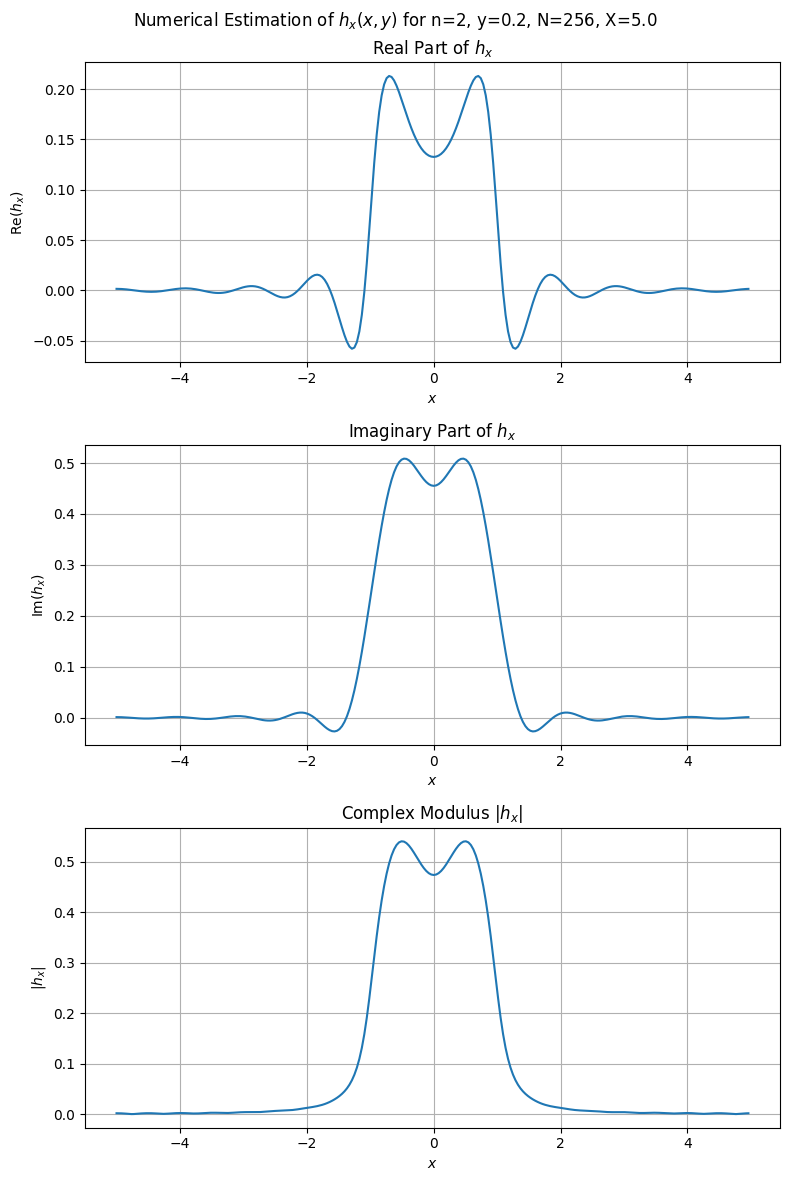

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def A(u, y, n):
    '''
    Computes the function A(u, y).
    Args:
        u: Array of u values.
        y: The y-coordinate.
        n: Integer parameter defining the current sheet width.
    Returns:
        A complex-valued array for A(u, y).
    '''
    # The term sin(n*pi*u)/u can be calculated using np.sinc, which is
    # defined as sin(pi*x)/(pi*x), to correctly handle the u=0 case.
    # sin(n*pi*u)/u = n*pi * sin(n*pi*u)/(n*pi*u) = n*pi * np.sinc(n*u)
    term_sin_over_u = n * np.pi * np.sinc(n * u)

    # Initialise A as a complex array of the same shape as u
    a_val = np.zeros_like(u, dtype=complex)

    mask_le_1 = np.abs(u) <= 1
    mask_gt_1 = np.abs(u) > 1

    # Apply the formula for |u| <= 1
    u1 = u[mask_le_1]
    a_val[mask_le_1] = term_sin_over_u[mask_le_1] * np.exp(2j * np.pi * y * np.sqrt(1 - u1**2))

    # Apply the formula for |u| > 1
    u2 = u[mask_gt_1]
    a_val[mask_gt_1] = term_sin_over_u[mask_gt_1] * np.exp(-2 * np.pi * np.abs(y) * np.sqrt(u2**2 - 1))

    return a_val

def compute_and_plot_hx(n, y, N, X):
    '''
    Computes and plots the real, imaginary, and modulus of h_x(x, y).
    Args:
        n: Integer parameter n.
        y: The y-coordinate.
        N: Number of points, must be a power of 2.
        X: The spatial range [-X, X].
    '''
    # Define numerical parameters
    dx = 2 * X / N          # Spatial step
    du = 1 / (2 * X)        # Frequency step (from Δu = 1/(N*Δx))

    # Create the array of u values for the FFT
    u_values = np.fft.fftfreq(N, d=dx)

    # Compute the sequence A(u, y)
    A_values = A(u_values, y, n)

    # Compute the IFFT of the A_values sequence
    h_hat_approx = np.fft.ifft(A_values)

    # Scale the result
    scaling_factor = (du / (2 * np.pi)) * N
    hx_unshiffed = scaling_factor * h_hat_approx

    # Shift the results from [0, 2X] for plotting over [-X, X]
    hx_estimate = np.fft.fftshift(hx_unshiffed)
    x_coords = np.linspace(-X, X, num=N, endpoint=False)

    # Plotting the results
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))
    fig.suptitle(f'Numerical Estimation of $h_x(x, y)$ for n={n}, y={y}, N={N}, X={X}')

    axs[0].plot(x_coords, np.real(hx_estimate))
    axs[0].set_title('Real Part of $h_x$')
    axs[0].set_xlabel('$x$')
    axs[0].set_ylabel('Re($h_x$)')
    axs[0].grid(True)

    axs[1].plot(x_coords, np.imag(hx_estimate))
    axs[1].set_title('Imaginary Part of $h_x$')
    axs[1].set_xlabel('$x$')
    axs[1].set_ylabel('Im($h_x$)')
    axs[1].grid(True)

    axs[2].plot(x_coords, np.abs(hx_estimate))
    axs[2].set_title('Complex Modulus $|h_x|$')
    axs[2].set_xlabel('$x$')
    axs[2].set_ylabel('$|h_x|$')
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

n = 2       # Positive integer
y = 0.2     # y-coordinate (must be non-zero)
N = 2**8    # Number of points (a power of 2 for efficient FFT)
X = 5.0     # Compute h_x for x in [-X, X]
compute_and_plot_hx(n, y, N, X)

To find $h_x(-x, y)$, we substitute $v = -u$ and flip the integration limits,
\begin{align}
    h_x(-x, y)
    &= \frac{1}{2\pi} \int_{-\infty}^\infty A(u, y) e^{-2\pi iux}\,du \\
    &= \frac{1}{2\pi} \int_{-\infty}^\infty A(-v, y) e^{2\pi ivx}\,dv
\end{align}
The function $A(u, y)$ depends on $u$ through $\sin(n\pi u)/u$ and $u^2$. Both of these are even functions of u, so $A(u, y)$ is an even function of $u$, i.e., $A(-v, y) = A(v, y)$. This yields
\begin{equation}
    h_x(-x, y) = \frac{1}{2\pi} \int_{-\infty}^\infty A(v, y)e^{2\pi ivx}\,dv = h_x(x, y).
\end{equation}
This implies that $h_x$ is an even function of $x$. Consequently, its real part, imaginary part, and modulus must all be even functions of $x$.

To find h_x(x, -y), we replace $y$ with $-y$ and integrate
\begin{equation}
    h_x(x, -y) = \frac{1}{2\pi} \int_{-\infty}^{\infty} A(u, -y)e^{2\pi iux}\,du.
\end{equation}
Let us compare $A(u, -y)$ with the complex conjugate of $A(u, y)$, which is $A^*(u, y)$. The term $\sin(n\pi u)/u$ is always real. The exponential term $\exp(-2\pi|y|\sqrt{u^2-1})$ is also identical. Therefore, $A(u, -y) = A(u, y) = A^*(u, y)$. Substituting this into the integral for $h_x(x, -y)$ yields
\begin{equation}
    h_x(x, -y) = \frac{1}{2\pi} \int_{-\infty}^{\infty} A^*(u, y)e^{2\pi iux}\,du = h_x^*(x, y.
\end{equation}
This implies that
\begin{align}
    \Re(h_x(x, -y)) &= \Re(h_x(x, y)), \\
    \Im(h_x(x, -y)) &= -\Im(h_x(x, y)), \\
    |h_x(x, -y)| &= |h_x(x, y)|.
\end{align}
Hence the real part is an even function in $y$, the imaginary part is an odd function in $y$, thus the modulus is an even function in $y$.